In [143]:
import numpy as np
from scipy import integrate, interpolate
import matplotlib.pyplot as plt

In [144]:
alpha = 0.5
beta = 0.3
N = 1000000
S = 990000
I = 7000
R = 3000
t0, tf = 0, 25

In [145]:
def dsdt(t, s):
    return -alpha * s

def didt(t, i, s):
    return alpha * s - beta * i

def drdt(t, i):
    return beta * i

slv_dsdt = integrate.solve_ivp(dsdt, (t0, tf), [S])

In [146]:
t, y = slv_dsdt.t, slv_dsdt.y[0]

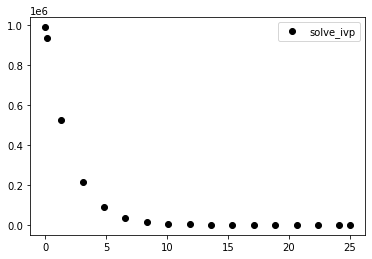

In [147]:
plt.plot(t, y, 'o', color='k', label='solve_ivp')
plt.legend()
plt.show()

In [148]:
slv_didt = integrate.solve_ivp(didt, (t0, tf), [I], args=(S,))

In [149]:
t1, y1 = slv_didt.t, slv_didt.y[0]

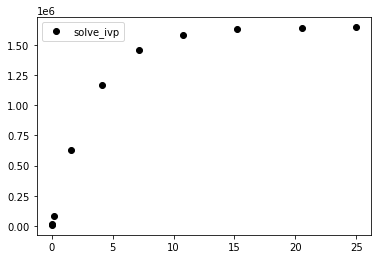

In [150]:
plt.plot(t1, y1, 'o', color='k', label='solve_ivp')
plt.legend()
plt.show()

In [151]:
slv_drdt = integrate.solve_ivp(drdt, (t0, tf), [I])

In [152]:
t2, y2 = slv_drdt.t, slv_drdt.y[0]

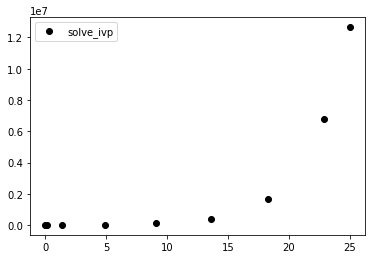

In [153]:
plt.plot(t2, y2, 'o', color='k', label='solve_ivp')
plt.legend()


In [154]:
func_y = interpolate.interp1d(t, y)
func_y1 = interpolate.interp1d(t1, y1)

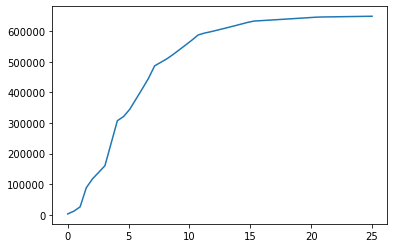

In [155]:
t3 = np.linspace(0, 25)
y3 = N - func_y(t3) - func_y1(t3)
plt.plot(t3, np.abs(y3))

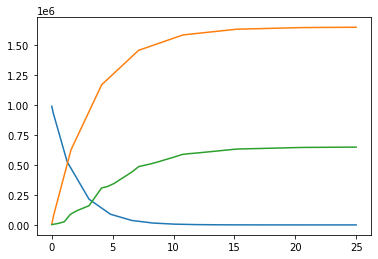

In [156]:
plt.plot(t, y)
plt.plot(t1, y1)
plt.plot(t3, np.abs(y3))